### Neural network with one hidden layer.
* Creating Neural Network in Python with single hidden layer and single output label.

In [0]:
#Import all applicable libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

#setting random seed.
np.random.seed(111)

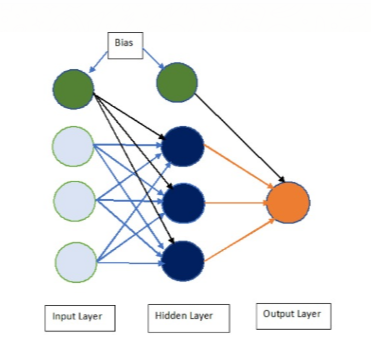

In [0]:
from IPython.display import Image

Image(filename='/data/neural_network.png',width=400, height=400)

### Part 1
* User can provide no of iterations (n_epoch), learning rate (l_rate), no of output nodes (n_output) and no of hidden layer (n_hidden) and max tolerance level.
* Activation function: **sigmoid / reLU**

In [0]:
class NeuralNetwork:
    def __init__(self, n_hidden, n_epoch=100, l_rate=0.03, n_output=1, tol=1e-4):
        self.n_hidden=n_hidden
        self.n_hidden_layer=1
        self.n_output=n_output
        self.n_epoch=n_epoch
        self.l_rate=l_rate
        self.tol=tol

    def fit(self,x,y):
        self.X = x
        #Inserting bias layer to the input
        self.X = np.insert(self.X, 0, np.ones((self.X.shape[0],)), axis=1)
        #weights for hidden layer (hidden neuron X input level)
        self.weights_h = np.random.rand(self.n_hidden, self.X.shape[1])
        #weights for output layer (output X hidden nuerons)
        self.weights_o = np.transpose(np.random.rand(self.n_output, self.n_hidden))
        self.y=np.reshape(y, (y.shape[0],1))
        
        #Iterating until no. of epochs
        for epoch in range(self.n_epoch):
            self._feedforward()
            self._backpropagation()
            
            #checking tolerance level
            if abs(self.y - self.a2).mean()<self.tol:
                break
                
    #Neural Network Feedforwrard function
    def _feedforward(self, X=None):
        
        if X is None:
            #when calling feed forward from predict
            X=self.X
        else:
            #when calling feed forward during training
            X = np.insert(X, 0, np.ones((X.shape[0],)), axis=1)
            
        #Finding sigmoid function input for hidden layer
        z1=np.dot(X, np.transpose(self.weights_h))
        #Finding input parameters for hidden layer - output form sigmoid function
        #call _reLU() for performance enhancement
        self.a1 = self._sigmoid(z1) 
        
        #Finding sigmoid function input for output layer
        z2=np.dot(self.a1, self.weights_o)
        #Finding input parameters for output layer - output form sigmoid function
        #call _reLU() for performance enhancement
        self.a2 = self._sigmoid(z2)
        
    #Sigmoid function to find the value of hidden layer nuerons
    def _sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    #rELU function to find the value of hidden layer nuerons
    def _reLU(self,z):
        z[z < 0] = 0
        return z
    
    #Relu transfer derivative function 
    def relu_transfer_derivative(self,a):
        a[a<=0] = 0
        a[a>0] = 1
        return a
    
    #Neural Network back propagartion function: for minimizing cost function,
    #It calculates back propagate error and eventually update weights.
    def _backpropagation(self):
        
        #small delta for layer L (L=final layerw)
        delta_L = self.y - self.a2
        
        #small delta for layer output layer (multiplying with prime sigmoid derivative)
        small_delta_o = delta_L * (self.a2)*(1-self.a2)
        #big delta for layer output layer
        big_delta_o = np.dot(self.a1.T, small_delta_o)
        
        #small delta for layer hidden layer (multiplying with prime sigmoid derivative)
        small_delta_h = np.dot(small_delta_o, self.weights_o.T) * (self.a1) * (1-self.a1)
        #big delta for layer hidden layer
        big_delta_h = np.dot(small_delta_h.T,self.X)
        
        #updating weights
        self.weights_h=self.weights_h+self.l_rate*big_delta_h
        self.weights_o=self.weights_o+self.l_rate*big_delta_o
        
    #class prediction for testing
    def predict(self, X):
        self._feedforward(X)
        #Threshold apply at 0.5 - class label is 1 belowand equals to 0.5, otherwise 0
        return np.where(self.a2 >= 0.5,1,0)

### Part 2
* Evaluation Matrix.

In [0]:
def evaluate_performance(y_test, y_pred):
    
    y_pred=np.array(y_pred)
    y_test=np.array(y_test)
    
    df_confusion = confusion_matrix(y_test, y_pred)
    print ("The confusion matrix: \n")
    print (df_confusion)
    TP=df_confusion.iloc[0][0]
    TN=df_confusion.iloc[1][1]
    FP=df_confusion.iloc[0][1]
    FN=df_confusion.iloc[1][0]
    print ()
    print ("Accuracy: %.5f" % ((TP + TN) / (TP + TN + FP + FN)))
    print ("Error Rate: %.2f" % ((FP + FN) / (TP + TN + FP + FN)))
    print ("Precision: %.2f" % (TP / (TP + FP)))
    print ("F-measure: %.2f" % (2 / ( (1 / (TP / (TP + FP))) + (1 / (TP/(TP + FN))) )))
    print ()
    print ("ROC Curve:")
    FPR, TPR, threshold = metrics.roc_curve(y_test, y_pred)
    plt.title('ROC Curve for 1 Layer Neural Network')
    plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % metrics.auc(FPR, TPR))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def confusion_matrix(y_test, y_pred):
    y_actu = pd.Series(y_test, name='Gold')
    y_pred = pd.Series(y_pred, name='Predicted')
    return pd.crosstab(y_actu, y_pred, margins=True)

### Part 3
* Testing the peformance of CIFAR-10 dataset using Neural Network developed above.
* We have taken binary classification between two images.
    * Deer (images index = 4)
    * Frog (images index = 6)
    
* Data Set Link: https://www.cs.toronto.edu/~kriz/cifar.html

In [0]:
import pickle
from sklearn.metrics import accuracy_score

#function to read image data from the data set.
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#Below function read images data (32x32) into the data set of (no of records X 1025, including class label)
#For training purpose, we have taken only green color channel having a float vector of 1024 for each image data.
def get_data_set(file):

    train_data=unpickle("/data/"+file)
    data=train_data[b'data']
    
    #inumerating to obtain indices of forg and deer data.
    deer_indices=[i for i,x in enumerate(train_data[b'labels']) if x == 4]
    frog_indices=[i for i,x in enumerate(train_data[b'labels']) if x == 6]

    #fetching deer images from the data based on indices
    deer_row_idx = np.array(deer_indices)
    deer=data[deer_row_idx, :]
    
    #fetching frog images from the data based on indices
    frog_row_idx = np.array(frog_indices)
    frog=data[frog_row_idx, :]
    
    #Frog: Slicing data set to choose only Green color channel for classification purpose.
    list_frog_deer=[]
    for i in range(frog.shape[0]):
        a=frog[i,1025:2049]
        a=np.append(a,1)
        list_frog_deer.append(a)
   
    #Deer: Slicing data set to choose only Green color channel for classification purpose.
    for i in range(deer.shape[0]):
        b=deer[i,1025:2049]
        b=np.append(b,0)
        list_frog_deer.append(b)

    data_array=np.array(list_frog_deer)
    #Creating pandas dataframe from numpy array
    return pd.DataFrame(np.array(list_frog_deer))

#Get data from the batch file
df=get_data_set("data_batch_1")

y = df[df.columns[len(df.columns)-1]].values
X = df[df.columns[0:1024]]

X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=49)

X_train = X_train.as_matrix() # convert the remaining columns to a numpy array
X_test = X_test.as_matrix() # convert the remaining columns to a numpy array

#Creating neural network model
net=NeuralNetwork(n_hidden=10,n_epoch=500, l_rate=0.3)
#Fitting on training data
net.fit(X_train,Y_train)
#Predicting class label of test data
y_pred=net.predict(X_test)
#Evaluating performance
accuracy_score(y_test.flatten(), y_pred.flatten())

/local/dev/tools/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/local/dev/tools/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.5105105105105106

### References

* Krizhevsky, A. (2019). The CIFAR-10 dataset. [online] Available at: https://www.cs.toronto.edu/~kriz/cifar.html [Accessed 4 Mar 2019].
* En.wikipedia.org. (2019). Rectifier (neural networks). [online] Available at: https://en.wikipedia.org/wiki/Rectifier_(neural_networks) [Accessed 4 Mar. 2019].
* Coursera. (2019). [online] Available at: https://www.coursera.org/learn/machine-learning/home/week/4 [Accessed 4 Mar. 2019].